In [7]:
import reservoirpy as rpy

rpy.verbosity(0)  # no need to be too verbose here
rpy.set_seed(42)  # make everything reproducible !

In [8]:
# Get training data

import numpy as np
import matplotlib.pyplot as plt

X = np.sin(np.linspace(0, 6*np.pi, 100)).reshape(-1, 1)

X_train = X[:50]
Y_train = X[1:51]

In [9]:
# create reservoir

from reservoirpy.nodes import Reservoir, Ridge, FORCE, ESN


reservoir = Reservoir(100, lr=0.5, sr=0.9)

In [10]:
# Create readout?

readout = Ridge(ridge=1e-7)

In [11]:
# Train??

train_states = reservoir.run(X_train, reset=True)
readout = readout.fit(train_states, Y_train, warmup=10)

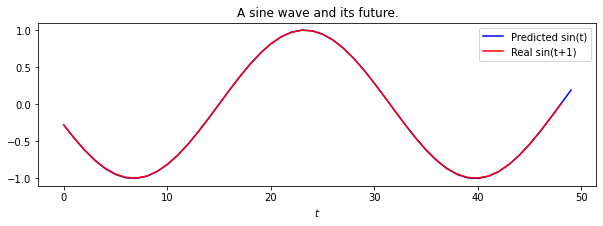

In [12]:
test_states = reservoir.run(X[50:])
Y_pred = readout.run(test_states)

plt.figure(figsize=(10, 3))
plt.title("A sine wave and its future.")
plt.xlabel("$t$")
plt.plot(Y_pred, label="Predicted sin(t)", color="blue")
plt.plot(X[51:], label="Real sin(t+1)", color="red")
plt.legend()
plt.show()